In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
text = [ 'Hello my name is james',
'james this is my python notebook',
'james trying to create a big dataset',
'james of words to try differnt',
'features of count vectorizer']

count_vec = CountVectorizer(max_df = 0.85)
count_matrix =count_vec.fit_transform(text)
count_array= count_matrix.toarray()
df  = pd.DataFrame(data = count_array,columns = count_vec.get_feature_names())

print(df)

   big  count  create  dataset  differnt  features  hello  is  james  my  \
0    0      0       0        0         0         0      1   1      1   1   
1    0      0       0        0         0         0      0   1      1   1   
2    1      0       1        1         0         0      0   0      1   0   
3    0      0       0        0         1         0      0   0      1   0   
4    0      1       0        0         0         1      0   0      0   0   

   name  notebook  of  python  this  to  try  trying  vectorizer  words  
0     1         0   0       0     0   0    0       0           0      0  
1     0         1   0       1     1   0    0       0           0      0  
2     0         0   0       0     0   1    0       1           0      0  
3     0         0   1       0     0   1    1       0           0      1  
4     0         0   1       0     0   0    0       0           1      0  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
text = ['This is the first document.','This document is the second document.','And this is the third one.', 'Is this the first document?']
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df)
print(coun_vect.vocabulary_)
print( coun_vect.get_feature_names())


   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1
{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

NameError: ignored

In [ ]:
df["sentiment"] = df["sentiment"].replace(4,1)

NameError: ignored

In [ ]:
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))


NameError: ignored

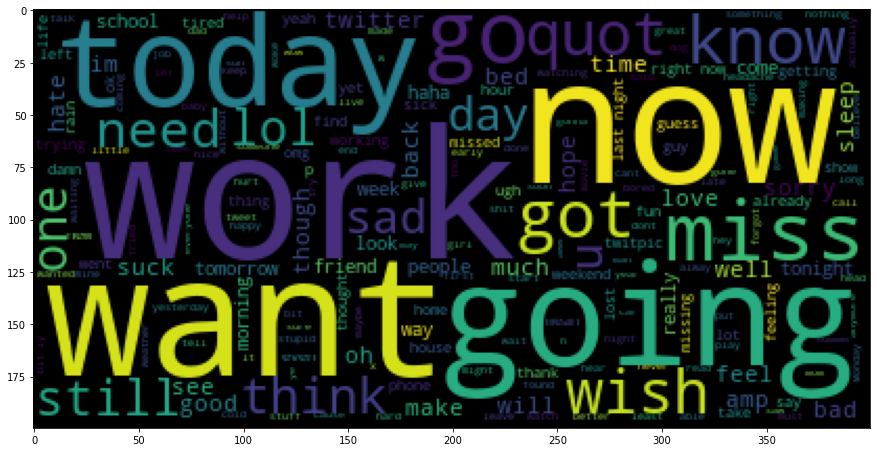

In [ ]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:
s_positive_tweets = positive_tweets.loc[0:10000]
count_vector = CountVectorizer(stop_words = ['english','https://','.com','@',r'^RT[\s]+',r'https?:\/\/.*[\r\n]*',r'#',r'[0-9]'])
count_matrix =count_vector.fit_transform(positive_tweets)
count_array1= count_matrix.toarray()
df  = pd.DataFrame(data = count_array1,columns = count_vector.get_feature_names())

NameError: ignored

In [ ]:
positive_tweets[:20]

['I LOVE @Health4UandPets u guys r the best!! ',
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!',
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ',
 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup',
 '@LovesBrooklyn2 he has that effect on everyone ',
 '@ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk!',
 '@r_keith_hill Thans for your response. Ihad already find this answer ',
 "@KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! ",
 '@tommcfly ah, congrats mr fletcher for finally joining twitter ',
 '@e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors ',
 'crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told m